In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import patches
import matplotlib as mpl
from scipy.spatial import ConvexHull




## Correlation

### Bubble plot with Encircling

In [3]:
midwest = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/midwest_filter.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


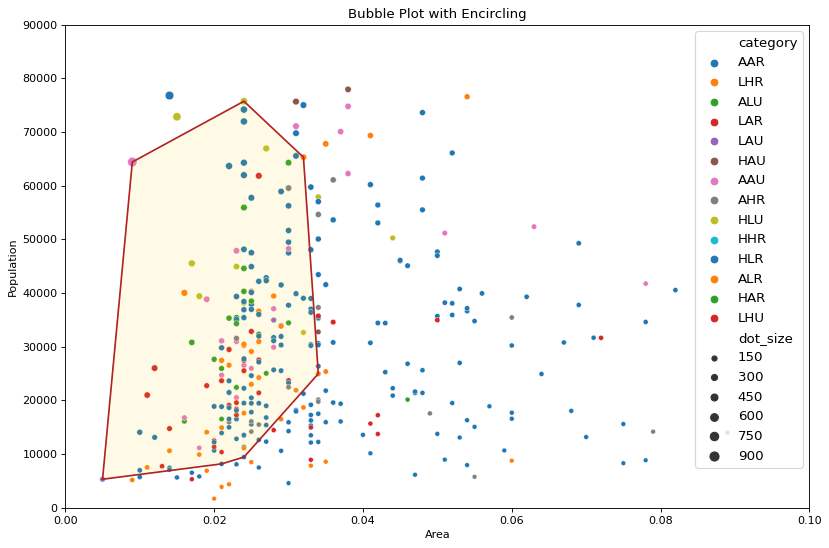

In [ ]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

g = sns.scatterplot(x='area',
                    y='poptotal',
                    data=midwest,
                    hue='category',
                    palette='tab10',
                    size='dot_size',
                    ax=ax)


# Encircling
def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = patches.Polygon(xy=p[hull.vertices, :], closed=True, **kw)
    ax.add_patch(poly)


g.set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

# Select data to be encircled
midwest_encircle_data = midwest.query('state == "IN"')

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         edgecolor='k',
         facecolor='gold',
         alpha=0.1)
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         edgecolor='firebrick',
         facecolor='none',
         linewidth=1.5)

ax.set(title='Bubble Plot with Encircling')
ax.legend(fontsize=12)
plt.show()

### Scatter plot with line of best fit

In [5]:
mpg = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


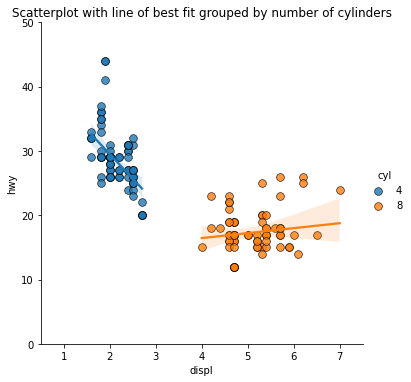

In [ ]:
mpg_select = mpg.query('cyl in [4, 8]')

g = sns.lmplot(x="displ",
               y="hwy",
               hue="cyl",
               data=mpg_select,
               robust=True,
               palette='tab10',
               scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

g.set(xlim=(0.5, 7.5), ylim=(0, 50), title="Scatterplot with line of best fit grouped by number of cylinders")
plt.show()

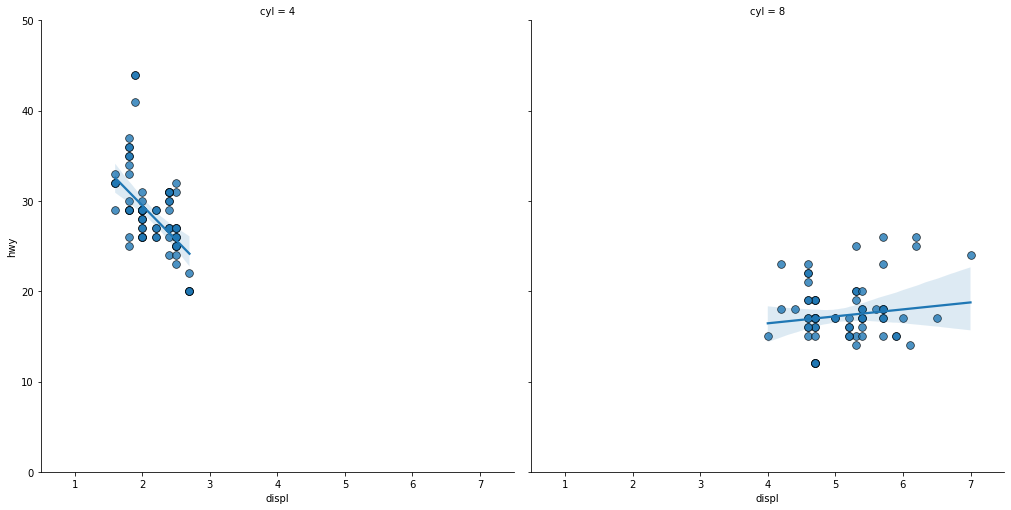

In [ ]:
g = sns.lmplot(x='displ',
               y='hwy',
               data=mpg_select,
               height=7,
               robust=True,
               palette='Set1',
               col='cyl',
               scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

g.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

### Jittering

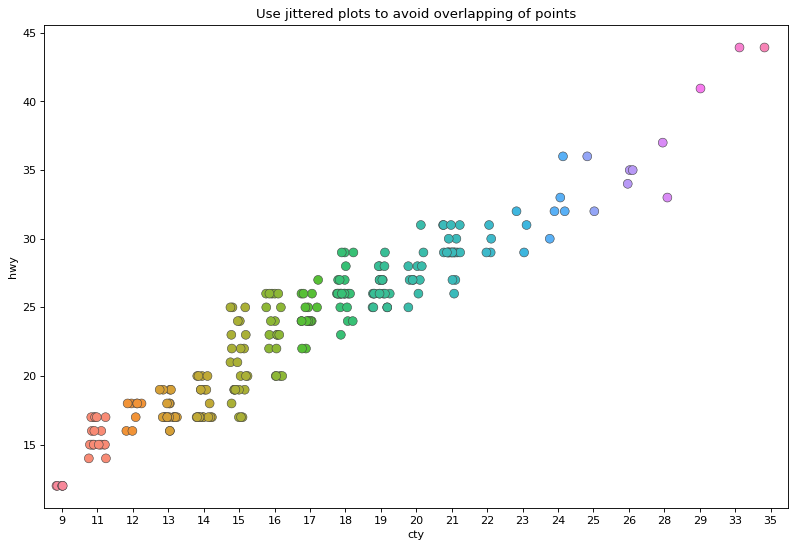

In [6]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

g = sns.stripplot(x='cty',
                  y='hwy',
                  data=mpg,
                  jitter=0.25,
                  size=8,
                  ax=ax,
                  linewidth=.5)

g.set(title='Use jittered plots to avoid overlapping of points')
plt.show()

### Marginal Plots

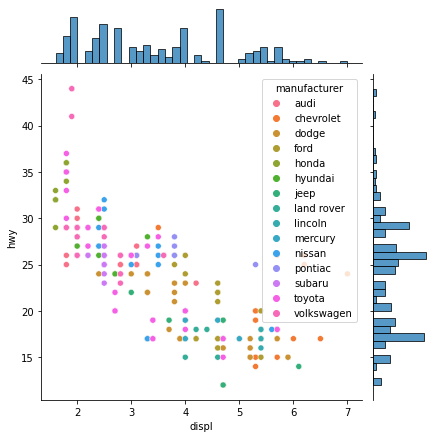

In [8]:
g = sns.JointGrid()
sns.scatterplot(data=mpg, x="displ", y="hwy", hue="manufacturer", ax=g.ax_joint)
sns.histplot(data=mpg, x="displ", bins=40, ax=g.ax_marg_x)
sns.histplot(data=mpg, y="hwy", bins=40, ax=g.ax_marg_y)
plt.show()

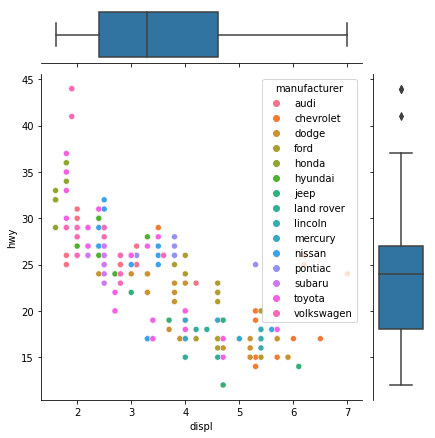

In [9]:
g = sns.JointGrid()
sns.scatterplot(data=mpg, x="displ", y="hwy", hue="manufacturer", ax=g.ax_joint)
sns.boxplot(data=mpg, x="displ", ax=g.ax_marg_x)
sns.boxplot(data=mpg, y="hwy", ax=g.ax_marg_y)
plt.show()

## Deviation

### Diverging Bar

In [11]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [12]:
x = mtcars['mpg']
mtcars['mpg_z'] = (x - x.mean()) / x.std()
mtcars['colors'] = ['red' if x < 0 else 'green' for x in mtcars['mpg_z']]
mtcars.sort_values('mpg_z', inplace=True)
mtcars.reset_index(inplace=True)
mtcars.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,Chrysler Imperial,-0.908604,red


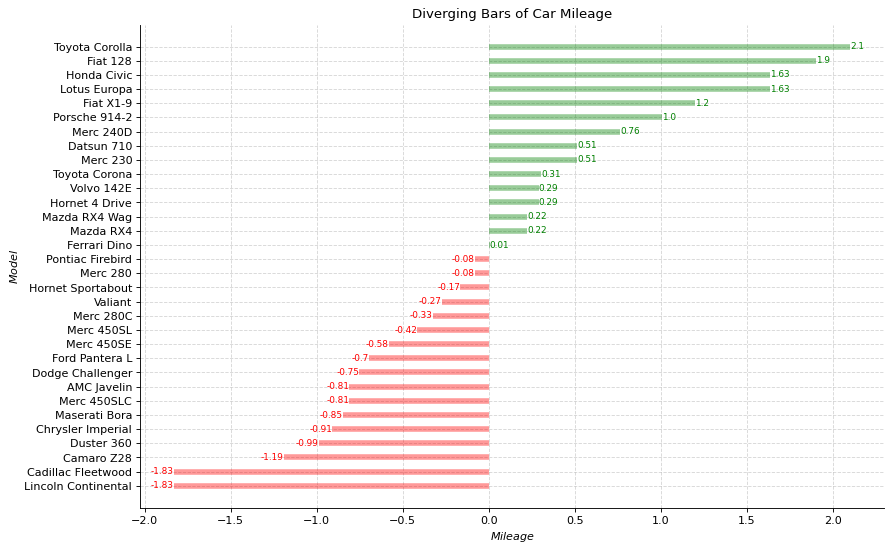

In [13]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.hlines(y=mtcars.index,
          xmin=0,
          xmax=mtcars.mpg_z,
          color=mtcars.colors,
          alpha=0.4,
          linewidth=5)

for x, y, tex in zip(mtcars.mpg_z, mtcars.index, mtcars.mpg_z):
    ax.text(x,
            y,
            round(tex, 2),
            horizontalalignment='right' if x < 0 else 'left',
            verticalalignment='center',
            fontdict={
                'color': 'red' if x < 0 else 'green',
                'size': 8
            })

sns.despine()
sns.set_context(font_scale=1.2)

ax.set(xlabel='$Mileage$', ylabel='$Model$', title='Diverging Bars of Car Mileage')
ax.set_yticks(mtcars.index)
ax.set_yticklabels(mtcars.cars)
ax.grid(linestyle='--', alpha=0.5)
plt.show()

### Diverging Dot

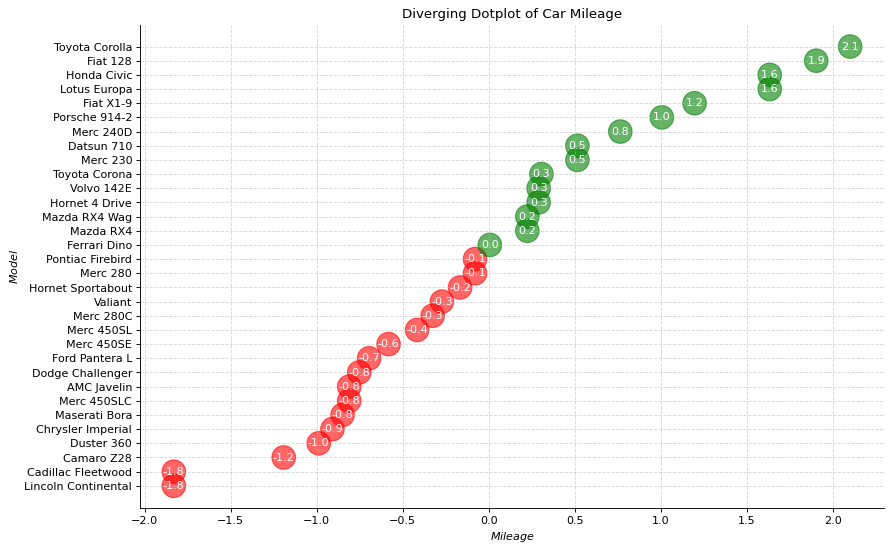

In [14]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.scatter(mtcars.mpg_z, mtcars.index, s=450, alpha=.6, color=mtcars.colors)
for x, y, tex in zip(mtcars.mpg_z, mtcars.index, mtcars.mpg_z):
    ax.text(x,
            y,
            round(tex, 1),
            horizontalalignment='center',
            verticalalignment='center',
            fontdict={'color': 'white'})

sns.despine()
sns.set_context(font_scale=1.2)

ax.set(xlabel='$Mileage$', ylabel='$Model$', title='Diverging Dotplot of Car Mileage')
ax.set_yticks(mtcars.index)
ax.set_yticklabels(mtcars.cars)
ax.grid(linestyle='--', alpha=0.5)
plt.show()

### Diverging Lollipop

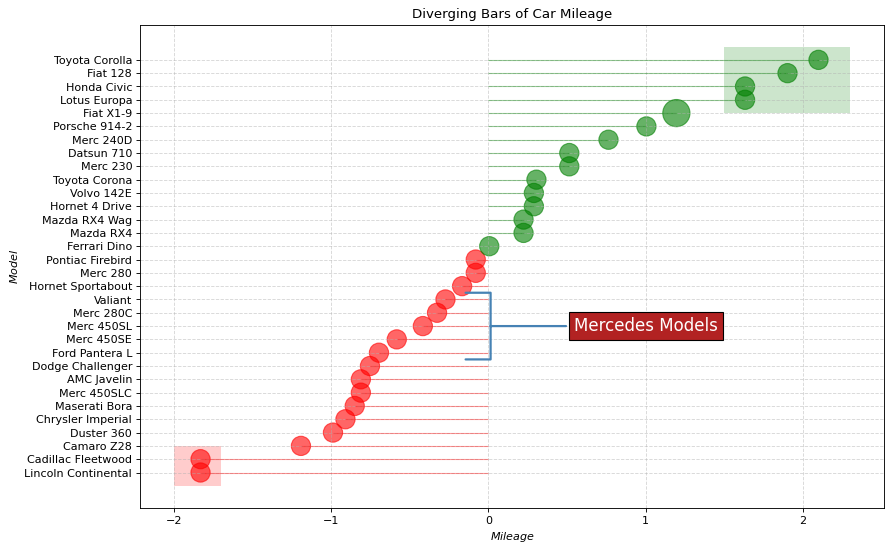

In [15]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.hlines(y=mtcars.index,
          xmin=0,
          xmax=mtcars.mpg_z,
          color=mtcars.colors,
          alpha=0.4,
          linewidth=1)

ax.scatter(mtcars.mpg_z,
           mtcars.index,
           color=mtcars.colors,
           s=[600 if x == 'Fiat X1-9' else 300 for x in mtcars.cars],
           alpha=0.6)

ax.annotate('Mercedes Models',
            xy=(0.0, 11.0),
            xytext=(1.0, 11),
            xycoords='data',
            fontsize=15,
            ha='center',
            va='center',
            color='white',
            bbox=dict(boxstyle='square', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=2.0, lengthB=1.5',
                            lw=2.0,
                            color='steelblue'))

p1 = patches.Rectangle((-2.0, -1),
                       width=.3,
                       height=3,
                       alpha=.2,
                       facecolor='red')
p2 = patches.Rectangle((1.5, 27),
                       width=.8,
                       height=5,
                       alpha=.2,
                       facecolor='green')
ax.add_patch(p1)
ax.add_patch(p2)

ax.set(xlabel='$Mileage$', ylabel='$Model$', title='Diverging Bars of Car Mileage')
ax.set_yticks(mtcars.index)
ax.set_yticklabels(mtcars.cars)
ax.grid(linestyle='--', alpha=0.5)
plt.show()

## Ranking

### Lollipop

In [17]:
mpg = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mpg.csv')
mpg_group = mpg[['cty', 'manufacturer'
                ]].groupby('manufacturer').apply(lambda x: x.mean())
mpg_group.sort_values('cty', inplace=True)
mpg_group.reset_index(inplace=True)
mpg_group.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


In [ ]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

markerline, stemlines, _ = ax.stem(mpg_group.index, mpg_group.cty)
stemlines.set_color('firebrick')
markerline.set_markerfacecolor('firebrick')
markerline.set_markeredgecolor('firebrick')

fs = 12
ax.set(ylim=(0, 30), ylabel='Miles Per Gallon', title='DLollipop Chart for Highway Mileage')

ax.set_xticks(mpg_group.index)
ax.set_xticklabels(mpg_group.manufacturer.str.upper(),
                   rotation=60,
                   fontdict={
                       'horizontalalignment': 'right',
                       'size': fs
                   })

for row in mpg_group.itertuples():
    ax.text(row.Index,
            row.cty + .5,
            s=round(row.cty, 2),
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=fs)

plt.show()

### Slope

In [18]:
from matplotlib import lines

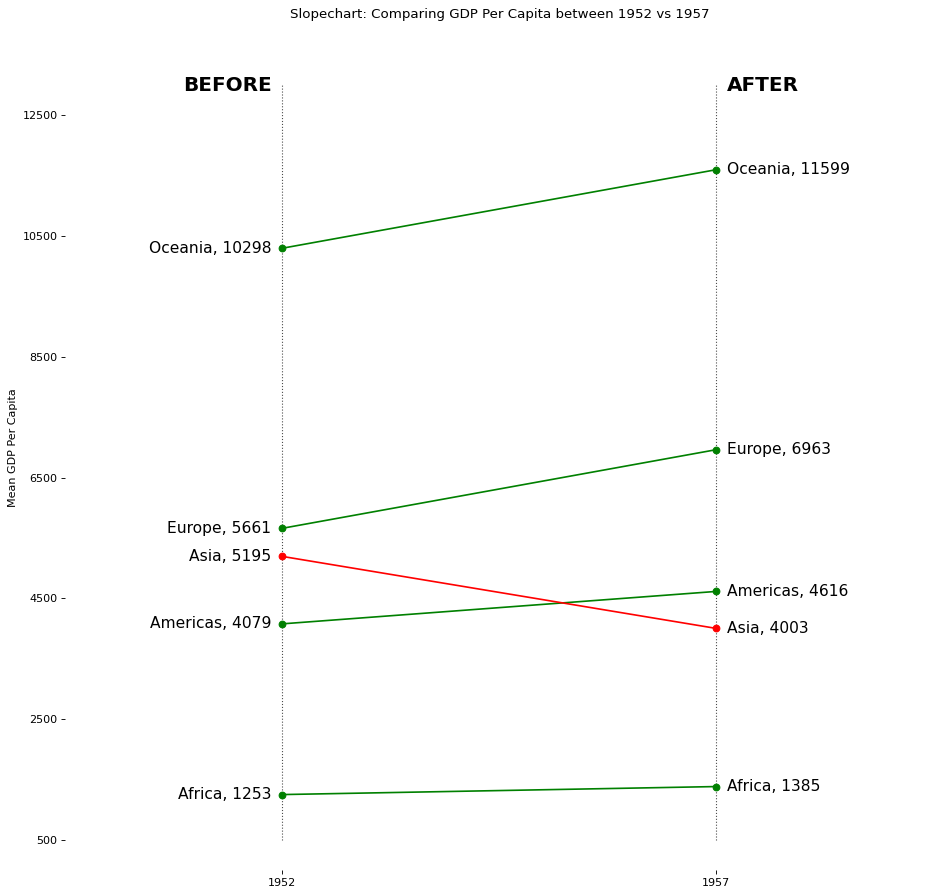

In [21]:
gdp = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/gdp_per_cap.csv')

left_label = [
    str(c) + ', ' + str(round(y)) for c, y in zip(gdp.continent, gdp['1952'])
]
right_label = [
    str(c) + ', ' + str(round(y)) for c, y in zip(gdp.continent, gdp['1957'])
]

year = [
    'red' if (y1 - y2) < 0 else 'green'
    for y1, y2 in zip(gdp['1952'], gdp['1957'])
]


def connect_line(p1, p2, ax, color='black'):
    l = lines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                     color='red' if p1[1] - p2[1] > 0 else 'green',
                     marker='o',
                     markersize=6)
    ax.add_line(l)
    return l


def border_line(x,
                ymin,
                ymax,
                ax,
                color='black',
                alpha=.7,
                linewidth=1,
                linestyle='dotted'):
    ax.vlines(x=x,
              ymin=ymin,
              ymax=ymax,
              color=color,
              alpha=alpha,
              linewidth=linewidth,
              linestyles=linestyle)


_, ax = plt.subplots(1, 1, figsize=(14, 14), dpi=80)

border_line(x=1, ymin=500, ymax=13000, ax=ax)
border_line(x=3, ymin=500, ymax=13000, ax=ax)

ax.scatter(y=gdp['1952'],
           x=np.repeat(1, gdp.shape[0]),
           s=10,
           color='black',
           alpha=0.7)
ax.scatter(y=gdp['1957'],
           x=np.repeat(3, gdp.shape[0]),
           s=10,
           color='black',
           alpha=0.7)

for p1, p2, c in zip(gdp['1952'], gdp['1957'], gdp['continent']):
    connect_line([1, p1], [3, p2], ax=ax)
    ax.text(1 - 0.05,
            p1,
            c + ', ' + str(round(p1)),
            horizontalalignment='right',
            verticalalignment='center',
            fontdict={'size': 14})
    ax.text(3 + 0.05,
            p2,
            c + ', ' + str(round(p2)),
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 14})

ax.text(1 - 0.05,
        13000,
        'BEFORE',
        horizontalalignment='right',
        verticalalignment='center',
        fontdict={
            'size': 18,
            'weight': 700
        })
ax.text(3 + 0.05,
        13000,
        'AFTER',
        horizontalalignment='left',
        verticalalignment='center',
        fontdict={
            'size': 18,
            'weight': 700
        })

fs = 12
ax.set(xlim=(0, 4), ylim=(0, 14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1, 3])
ax.set_xticklabels(['1952', '1957'])
ax.set_yticks(np.arange(500, 13000, 2000))
ax.set_yticklabels(np.arange(500, 13000, 2000))
ax.set(title='Slopechart: Comparing GDP Per Capita between 1952 vs 1957')

ax.spines['top'].set_alpha(.0)
ax.spines['bottom'].set_alpha(.0)
ax.spines['right'].set_alpha(.0)
ax.spines['left'].set_alpha(.0)
plt.show()

### Dumbbell

In [23]:
health = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/health.csv')
health.sort_values('pct_2014', inplace=True)
health.reset_index(inplace=True)
health.head()

,index,Area,pct_2014,pct_2013
0,25,Boston,0.04,0.04
1,23,Pittsburgh,0.06,0.07
2,22,Baltimore,0.06,0.09
3,24,Minneapolis,0.06,0.08
4,21,San Francisco,0.08,0.11


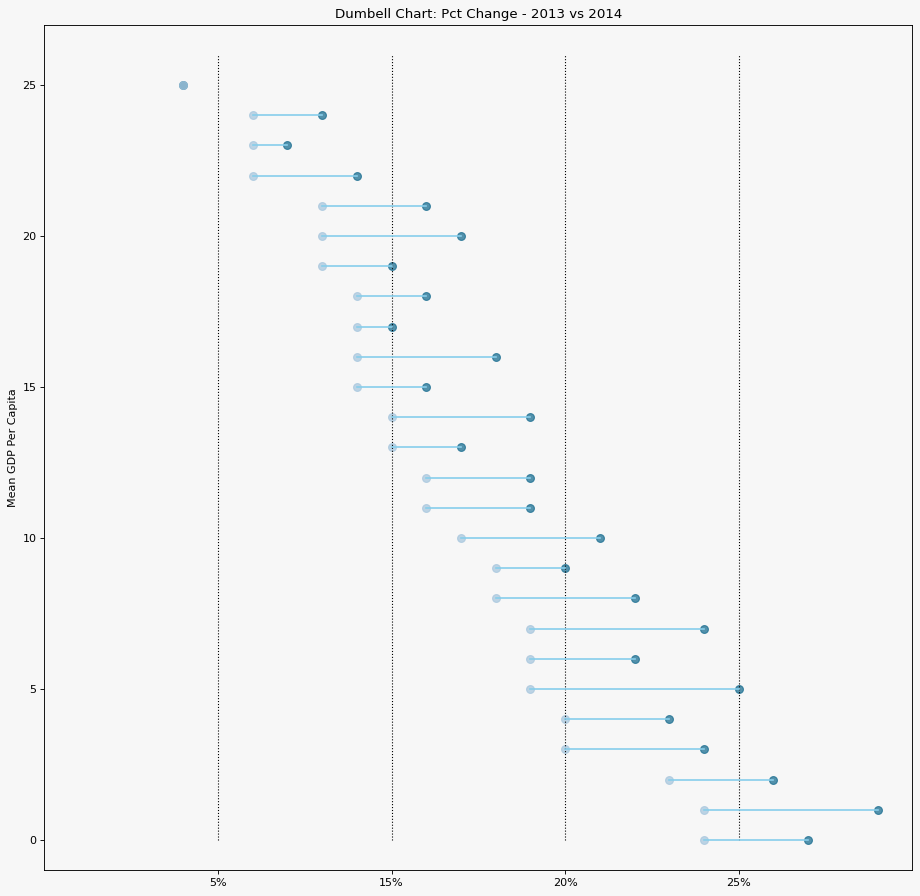

In [25]:
def connect_line(p1, p2, ax, color='black'):
    l = lines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color='skyblue')
    ax.add_line(l)
    return l


_, ax = plt.subplots(1, 1, figsize=(14, 14), facecolor='#f7f7f7', dpi=80)


def border_line(x,
                ymin,
                ymax,
                ax,
                color='black',
                alpha=1,
                linewidth=1,
                linestyle='dotted'):
    ax.vlines(x=x,
              ymin=ymin,
              ymax=ymax,
              color=color,
              alpha=alpha,
              linewidth=linewidth,
              linestyles=linestyle)


border_line(x=.05, ymin=0, ymax=26, ax=ax)
border_line(x=.10, ymin=0, ymax=26, ax=ax)
border_line(x=.15, ymin=0, ymax=26, ax=ax)
border_line(x=.20, ymin=0, ymax=26, ax=ax)

ax.scatter(y=health['index'],
           x=health['pct_2013'],
           color='#0e668b',
           s=50,
           alpha=0.7)

ax.scatter(y=health['index'],
           x=health['pct_2014'],
           color='#a3c4dc',
           s=50,
           alpha=0.7)

for i, p1, p2 in zip(health['index'], health['pct_2013'], health['pct_2014']):
    connect_line([p1, i], [p2, i], ax)

fs = 12
ax.set(xlim=(0, .25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_facecolor('#f7f7f7')
ax.set(title='Dumbell Chart: Pct Change - 2013 vs 2014')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
plt.show()

## Distribution

### Stacked Bar

In [26]:
mpg = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mpg.csv')

x_var, group_var = 'displ', 'class'
mpg_agg = mpg[[x_var, group_var]].groupby(group_var)
mpg_agg.head(10)

,displ,class
0,1.8,compact
1,1.8,compact
2,2.0,compact
3,2.0,compact
4,2.8,compact
...,...,...
97,4.6,subcompact
98,5.4,subcompact
99,1.6,subcompact
108,2.4,midsize


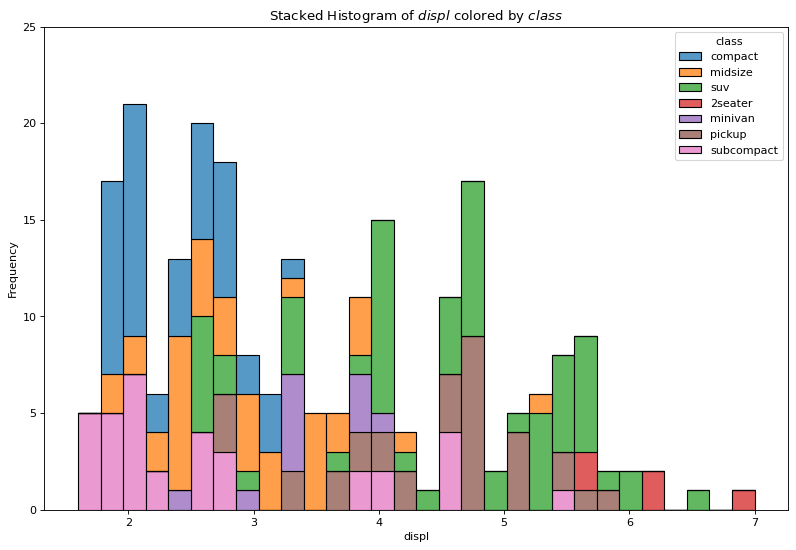

In [27]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

sns.histplot(data=mpg, x=x_var, hue=group_var, bins=30, multiple="stack", ax=ax)

sns.set_context(font_scale=2)
ax.set(ylim=(0, 25), xlabel=x_var, ylabel='Frequency', title=f'Stacked Histogram of ${x_var}$ colored by ${group_var}$')
plt.show()

### Density

In [28]:
mpg = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [29]:
mpg['_class'] = mpg['class']
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,_class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,compact


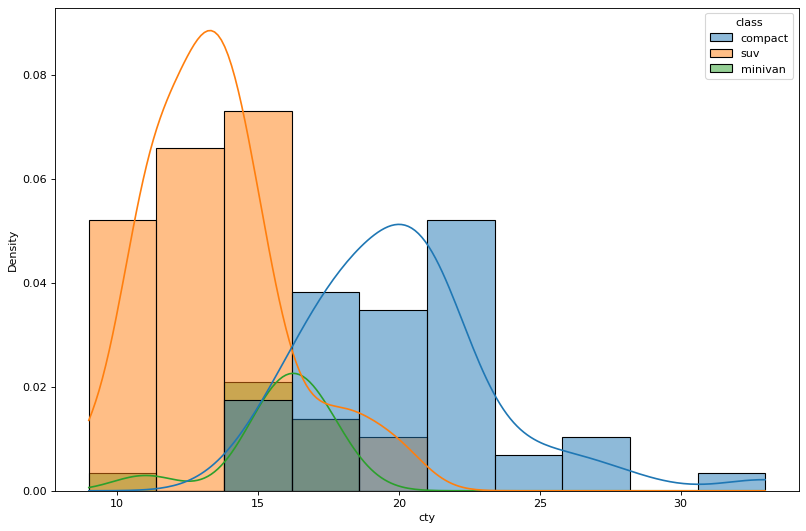

In [30]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

sns.histplot(data=mpg.query("_class in ['compact', 'suv', 'minivan']"), x='cty', hue='class', stat='density', kde=True, ax=ax)
plt.show()

### Ridge

In [31]:
m = mpg['cty'].map(ord)
df["hwy"] += m

g = sns.FacetGrid(mpg, row="cty", hue="cty")
g.map(sns.kdeplot, 'hwy',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1)
g.map(sns.kdeplot, 'hwy', clip_on=False, color="w", bw_adjust=.5)
g.map(ax.axhline, y=0, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'hwy')

g.fig.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

g.set(title='Joy Plot of City and Highway Mileage by Class')

TypeError: ignored

### Dot

In [32]:
mpg = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [33]:
x_var = 'cty'
group_var = 'manufacturer'

mpg_group = mpg[[x_var, group_var]].groupby(group_var).apply(lambda x: x.mean())
mpg_group.sort_values(x_var, inplace=True)
mpg_group.reset_index(inplace=True)
mpg_group.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


In [34]:
mpg_group.sort_values('manufacturer', inplace=True)
mpg_group.head()

,manufacturer,cty
8,audi,17.611111
6,chevrolet,15.000000
2,dodge,13.135135
5,ford,14.000000
14,honda,24.444444


In [35]:
mpg_group.index

Int64Index([8, 6, 2, 5, 14, 11, 4, 1, 0, 3, 9, 7, 12, 10, 13], dtype='int64')

In [36]:
mpg_group_median = mpg[[x_var, group_var
                       ]].groupby(group_var).apply(lambda x: x.median())
mpg_group_median.sort_values(x_var, inplace=True)
mpg_group_median.reset_index(inplace=True)
mpg_group_median.head()

,manufacturer,cty
0,lincoln,11.0
1,land rover,11.5
2,dodge,13.0
3,mercury,13.0
4,ford,14.0


ValueError: ignored

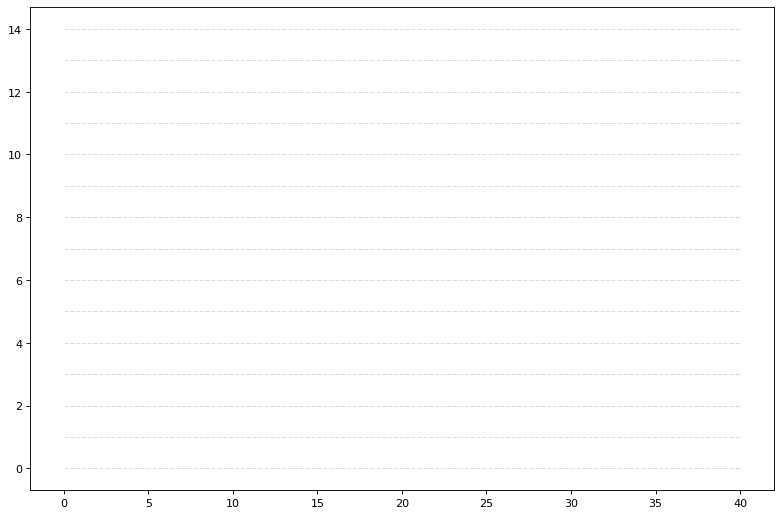

In [38]:
mpg_group = mpg[['cty', 'manufacturer'
                 ]].groupby('manufacturer').apply(lambda x: x.mean())
mpg_group.sort_values('cty', ascending=False, inplace=True)
mpg_group.reset_index(inplace=True)
mpg_group_median = mpg[['cty', 'manufacturer'
                        ]].groupby('manufacturer').apply(lambda x: x.median())

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.hlines(y=mpg_group.index,
          xmin=0,
          xmax=40,
          color='gray',
          alpha=0.5,
          linewidth=.5,
          linestyles='dashdot')

for i, mark in enumerate(mpg_group.manufacturer):
    mpg_group_mark = mpg.loc[mpg.manufacturer == mark, :]
    ax.scatter(y=np.repeat(i, mpg_group_mark.shape[0]),
               x='cty',
               data=mpg_group_mark,
               s=75,
               edgecolors='gray',
               c='w',
               alpha=0.5)
    ax.scatter(y=i,
               x='cty',
               data=mpg_group_median.loc[mpg_group_median.index == mark, :],
               s=75,
               c='firebrick')

ax.text(33,
        13,
        "$red \ dots \ are \ the \ median$",
        fontdict={'size': 12},
        color='firebrick')

red_patch = ax.plot([], [],
                    marker="o",
                    ms=10,
                    ls="",
                    mec=None,
                    color='firebrick',
                    label="Median")
ax.legend(handles=red_patch)

ax.set(title='Distribution of City Mileage by Make')
ax.set(xlabel='Miles Per Gallon (City)')
ax.set_yticks(mpg_group.index)
ax.set_yticklabels(
    mpg_group.manufacturer.str.title(),
    fontdict={'horizontalalignment': 'right'},
)
ax.set(xlim=(1, 40))
ax.set_xticklabels(range(0, 45, 5), alpha=0.7)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

### Box

In [39]:
mpg['_class'] = mpg['class']
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,_class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,midsize


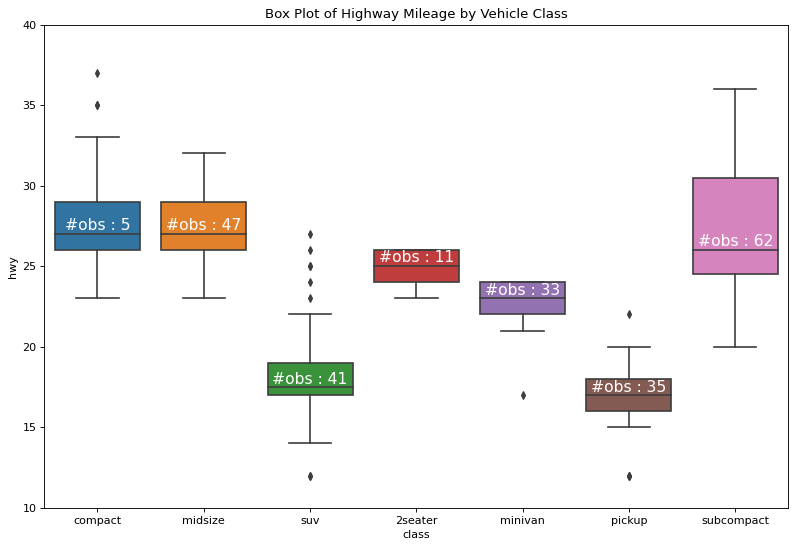

In [40]:
def add_n_obs(df, group_col, y):
    medians_dict = {
        group[0]: group[1][y].median()
        for group in df.groupby(group_col)
    }
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        ax.text(x,
                 medians_dict[xticklabel] * 1.01,
                 "#obs : " + str(n_ob),
                 horizontalalignment='center',
                 fontdict={'size': 14},
                 color='white')


_, ax = plt.subplots(figsize=(12, 8), dpi=80)

g = sns.boxplot(x='class', y='hwy', data=mpg, notch=False, ax=ax)
add_n_obs(mpg, group_col='class', y='hwy')

g.set(ylim=(10, 40))
ax.set(title='Box Plot of Highway Mileage by Vehicle Class')
plt.show()

### Pyramid

In [42]:
email = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/email_campaign_funnel.csv')
email.head()

,Stage,Gender,Users
0,Stage 01: Browsers,Male,-1.492762e+07
1,Stage 02: Unbounced Users,Male,-1.286266e+07
2,Stage 03: Email Signups,Male,-1.136190e+07
3,Stage 04: Email Confirmed,Male,-9.411708e+06
4,Stage 05: Campaign-Email Opens,Male,-8.074317e+06


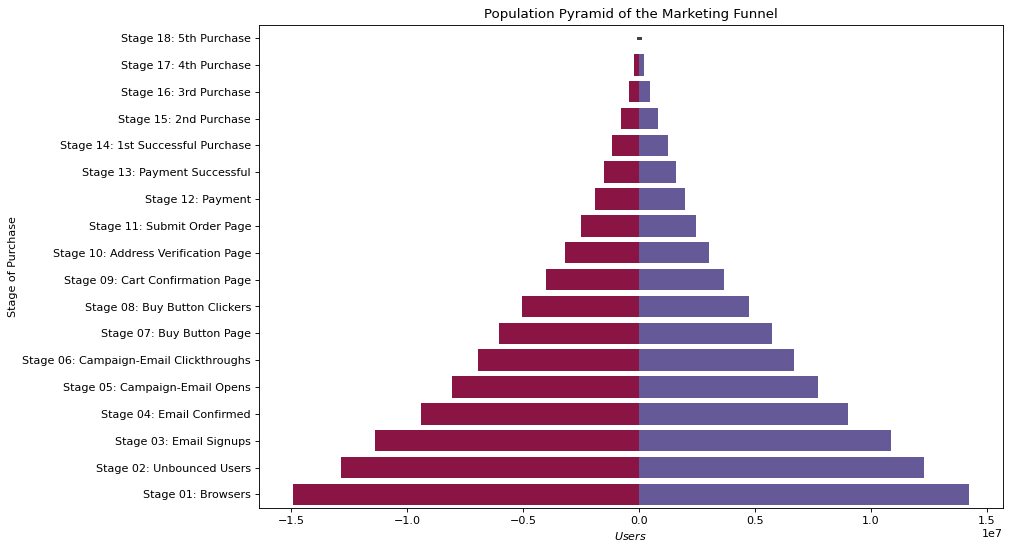

In [43]:
group_col = 'Gender'
order_of_bars = email.Stage.unique()[::-1]

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

colors = [
    plt.cm.Spectral(i / float(len(email[group_col].unique()) - 1))
    for i in range(len(email[group_col].unique()))
]

for c, group in zip(colors, email[group_col].unique()):
    sns.barplot(x='Users',
                y='Stage',
                data=email.loc[email[group_col] == group, :],
                order=order_of_bars,
                color=c,
                label=group,
                ax=ax)

fs = 12
ax.set(xlabel="$Users$",ylabel="Stage of Purchase",title="Population Pyramid of the Marketing Funnel")
plt.show()

### Category

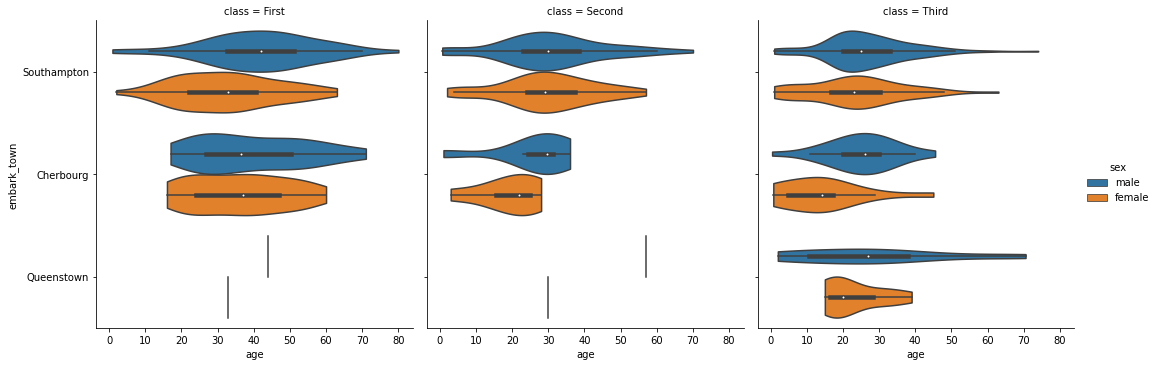

In [44]:
titanic = sns.load_dataset("titanic")

sns.catplot(x="age",
            y="embark_town",
            hue="sex",
            col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h",
            height=5,
            aspect=1,
            palette="tab10",
            kind="violin",
            dodge=True,
            cut=0)

## Composition

### Waffle

In [45]:
from pywaffle import Waffle

ModuleNotFoundError: ignored

In [46]:
mpg_group = mpg.groupby('class').size().reset_index(name='counts')
n_categories = mpg_group.shape[0]

colors = [
    plt.cm.inferno_r(i / float(n_categories)) for i in range(n_categories)
]

fig = plt.subplots(
    FigureClass=Waffle,
    plots={
        '111': {
            'values':
            mpg_group['counts'],
            'labels': [
                '{0} ({1})'.format(n[0], n[1])
                for n in mpg_group[['class', 'counts']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12
            },
            'title': {
                'label': '# Vehicles by Class',
                'loc': 'center',
                'fontsize': 18
            }
        },
    },
    rows=7,
    colors=colors,
    figsize=(12, 8))

NameError: ignored

In [ ]:
df_class = mpg.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [
    plt.cm.Set3(i / float(n_categories)) for i in range(n_categories)
]

df_cyl = mpg.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [
    plt.cm.Spectral(i / float(n_categories)) for i in range(n_categories)
]

df_make = mpg.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [
    plt.cm.tab20b(i / float(n_categories)) for i in range(n_categories)
]

fig = plt.subplots(
    FigureClass=Waffle,
    plots={
        '311': {
            'values':
            df_class['counts_class'],
            'labels': [
                '{1}'.format(n[0], n[1])
                for n in df_class[['class', 'counts_class']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12,
                'title': 'Class'
            },
            'title': {
                'label': '# Vehicles by Class',
                'loc': 'center',
                'fontsize': 18
            },
            'colors':
            colors_class
        },
        '312': {
            'values':
            df_cyl['counts_cyl'],
            'labels': [
                '{1}'.format(n[0], n[1])
                for n in df_cyl[['cyl', 'counts_cyl']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12,
                'title': 'Cyl'
            },
            'title': {
                'label': '# Vehicles by Cyl',
                'loc': 'center',
                'fontsize': 18
            },
            'colors':
            colors_cyl
        },
        '313': {
            'values':
            df_make['counts_make'],
            'labels': [
                '{1}'.format(n[0], n[1])
                for n in df_make[['manufacturer', 'counts_make']].itertuples()
            ],
            'legend': {
                'loc': 'upper left',
                'bbox_to_anchor': (1.05, 1),
                'fontsize': 12,
                'title': 'Manufacturer'
            },
            'title': {
                'label': '# Vehicles by Make',
                'loc': 'center',
                'fontsize': 18
            },
            'colors':
            colors_make
        }
    },
    rows=9,
    figsize=(16, 14))


### Pie

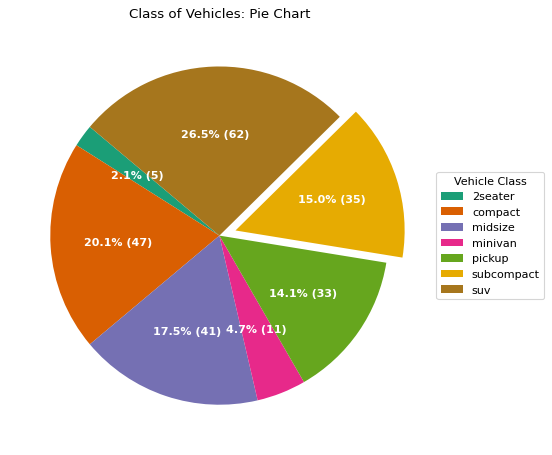

In [47]:
mpg_group = mpg.groupby('class').size().reset_index(name='counts')

_, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi=80)

data = mpg_group['counts']
categories = mpg_group['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]


def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}% ({absolute})"


wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"),
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140,
                                  explode=explode)

ax.legend(wedges,
          categories,
          title="Vehicle Class",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set(title="Class of Vehicles: Pie Chart")
plt.show()

### Peaks

In [48]:
passengers = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/air_passengers.csv')
passengers.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [49]:
traffic = passengers.value
doublediff = np.diff(np.sign(np.diff(traffic)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1 * traffic)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

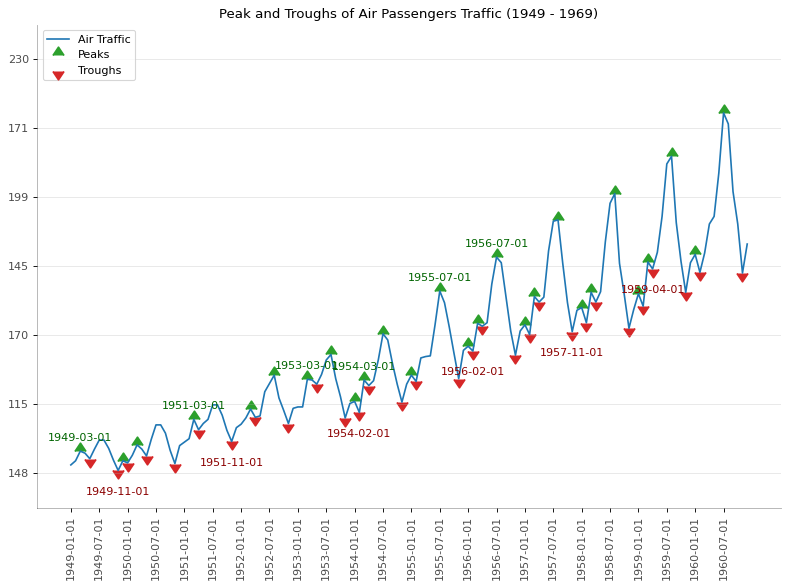

In [52]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.plot('date', 'value', data=passengers, color='tab:blue', label='Air Traffic')

ax.scatter(passengers.date[peak_locations],
            passengers.value[peak_locations],
            marker=mpl.markers.CARETUPBASE,
            color='tab:green',
            s=100,
            label='Peaks')

ax.scatter(passengers.date[trough_locations],
            passengers.value[trough_locations],
            marker=mpl.markers.CARETDOWNBASE,
            color='tab:red',
            s=100,
            label='Troughs')

for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    ax.text(passengers.date[p],
             passengers.value[p] + 15,
             passengers.date[p],
             horizontalalignment='center',
             color='darkgreen')

    ax.text(passengers.date[t],
             passengers.value[t] - 35,
             passengers.date[t],
             horizontalalignment='center',
             color='darkred')

xtick_location = passengers.index.tolist()[::6]
xtick_labels = passengers.date.tolist()[::6]
ytick_labels = passengers.value.tolist()[::6]

ax.set(ylim=(50, 750))
ax.set_xticks(ticks=xtick_location)
ax.set_xticklabels(labels=xtick_labels, rotation=90, alpha=.7)
ax.set(title='Peak and Troughs of Air Passengers Traffic (1949 - 1969)')
ax.set_yticklabels(ytick_labels, alpha=.7)

ax.spines['top'].set_alpha(.0)
ax.spines['bottom'].set_alpha(.3)
ax.spines['right'].set_alpha(.0)
ax.spines['left'].set_alpha(.3)

ax.legend(loc='upper left')
ax.grid(axis='y', alpha=.3)
plt.show()

### Cross Correlation

In [53]:
import statsmodels.tsa.stattools as stattools

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


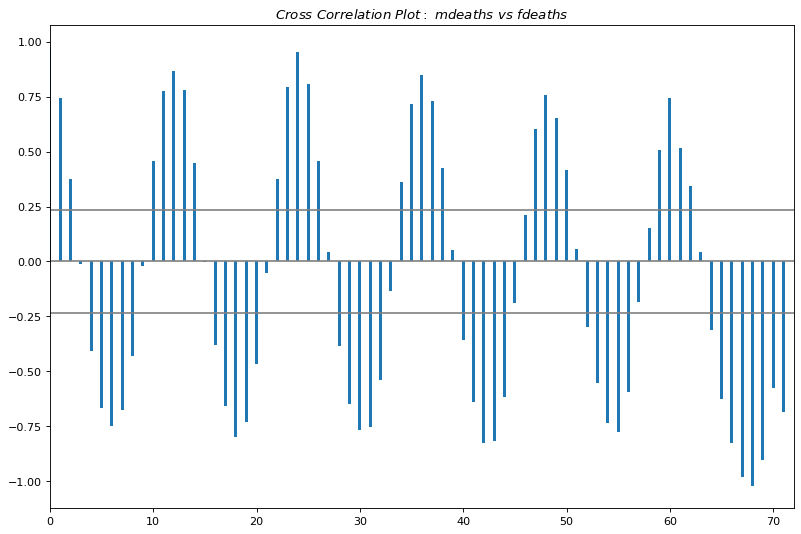

In [55]:
mortality = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mortality.csv')
x = mortality['mdeaths']
y = mortality['fdeaths']

ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

conf_level = 2 / np.sqrt(nlags)

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.hlines(0, xmin=0, xmax=100, color='gray')
ax.hlines(conf_level, xmin=0, xmax=100, color='gray')
ax.hlines(-conf_level, xmin=0, xmax=100, color='gray')

ax.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

ax.set(title='$Cross\ Correlation\ Plot:\ mdeaths\ vs\ fdeaths$')
ax.set(xlim=(0, len(ccs)))
plt.show()

### Decomposition

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

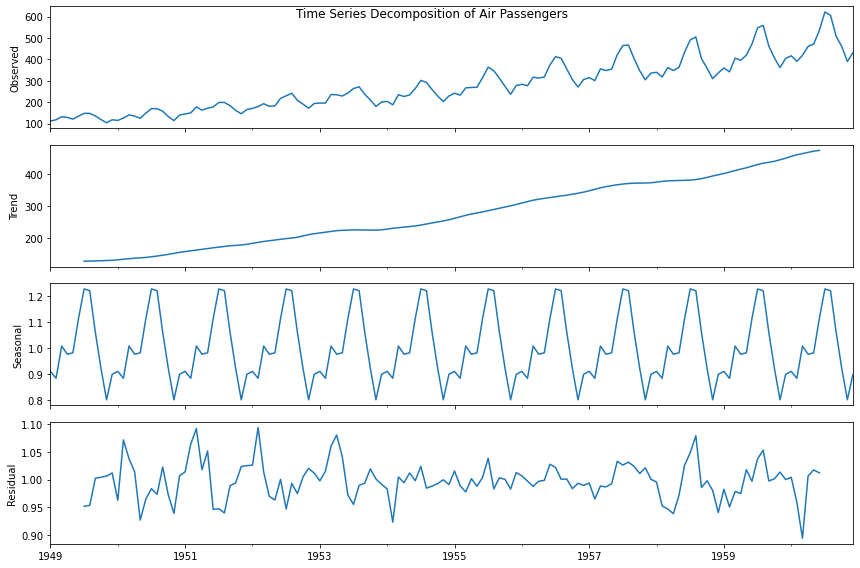

In [57]:
dates = pd.DatetimeIndex(
    [parse(d).strftime('%Y-%m-01') for d in passengers['date']])
passengers.set_index(dates, inplace=True)

result = seasonal_decompose(passengers['value'], model='multiplicative')

plt.rcParams.update({'figure.figsize': (12, 8)})

result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

### Doule Y

In [58]:
economics = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/economics.csv', parse_dates=['date'])

economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958
3,1967-10-01,512.9,199311,12.5,4.9,3143
4,1967-11-01,518.1,199498,12.5,4.7,3066


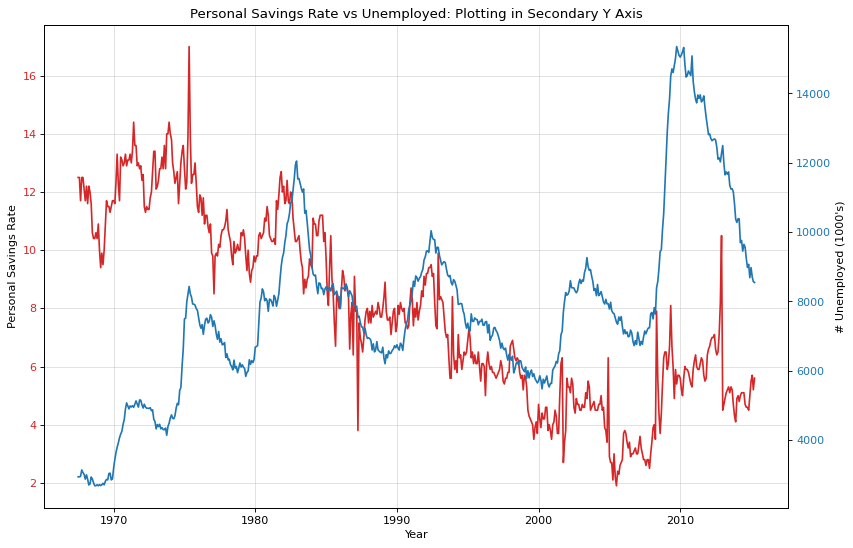

In [63]:
x = economics['date']
y1 = economics['psavert']
y2 = economics['unemploy']

_, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

ax.set(xlabel='Year')
ax.tick_params(axis='x', rotation=0)
ax.set(ylabel='Personal Savings Rate')
ax.tick_params(axis='y', rotation=0, labelcolor='tab:red')
ax.grid(alpha=.4)

ax2.set(ylabel='# Unemployed (1000\'s)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set(title=
    'Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis')
plt.show()

### SEM

In [64]:
from scipy.stats import sem

In [65]:
orders = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/user_orders_hourofday.csv')
orders.head()

,user_id,order_hour_of_day,quantity
0,1,7,20
1,1,8,23
2,1,9,12
3,1,12,11
4,1,14,10


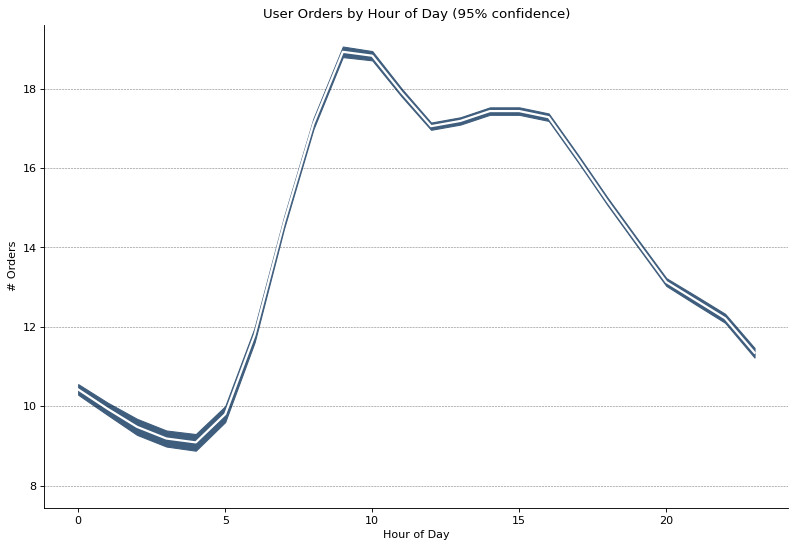

In [67]:
orders_mean = orders.groupby('order_hour_of_day').quantity.mean()
orders_se = orders.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)

x = orders_mean.index

fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.set(ylabel='# Orders')
ax.plot(x, orders_mean, color='white', lw=2)
ax.fill_between(x,
                orders_mean - orders_se,
                orders_mean + orders_se,
                color='#3F5D7D')

ax.spines['top'].set_alpha(0)
ax.spines['bottom'].set_alpha(1)
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_alpha(1)
ax.set(title='User Orders by Hour of Day (95% confidence)')
ax.set(xlabel='Hour of Day')

s, e = ax.get_xlim()
ax.set(xlim=(s, e))

for y in range(8, 20, 2):
    ax.hlines(y,
               xmin=s,
               xmax=e,
               colors='black',
               alpha=0.5,
               linestyles='--',
               lw=0.5)

plt.show()

In [68]:
from dateutil.parser import parse
from scipy.stats import sem

In [69]:
orders_45d = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/orders_45d.csv',
                         parse_dates=['purchase_time', 'purchase_date'])
orders_45d.head()

,purchase_time,purchase_date,quantity
0,2017-05-16 13:10:30,2017-05-16,5
1,2017-05-16 19:41:10,2017-05-16,3
2,2017-05-19 18:53:40,2017-05-19,2
3,2017-05-18 13:55:47,2017-05-18,1
4,2017-05-14 20:28:25,2017-05-14,3


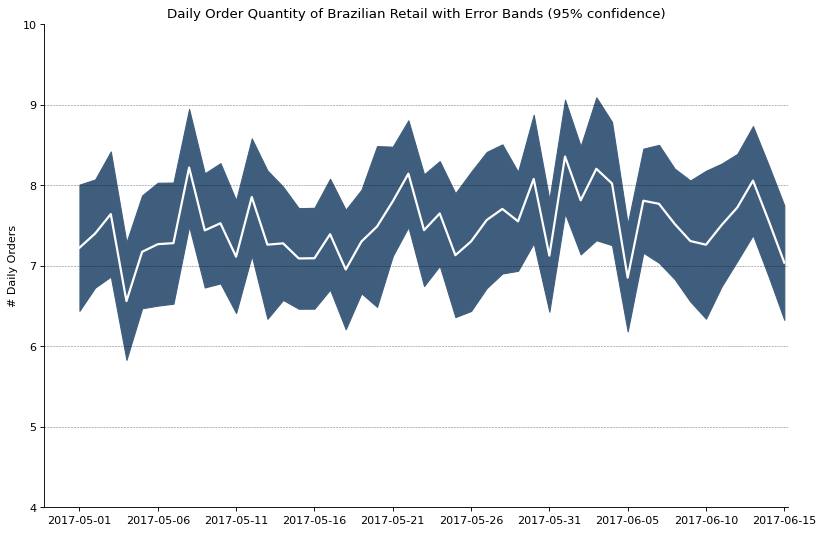

In [74]:
orders_mean = orders_45d.groupby('purchase_date').quantity.mean()
orders_se = orders_45d.groupby('purchase_date').quantity.apply(sem).mul(1.96)

x = [d.date().strftime('%Y-%m-%d') for d in orders_mean.index]

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.plot(x, orders_mean, color='white', lw=2)
ax.fill_between(x,
                orders_mean - orders_se,
                orders_mean + orders_se,
                color='#3F5D7D')

ax.spines['top'].set_alpha(0)
ax.spines['bottom'].set_alpha(1)
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_alpha(1)

ax.set(ylabel='# Daily Orders')
ax.set_xticks(np.arange(0, len(x), 5))
ax.set(title=
    'Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)')

s, e = ax.get_xlim()
ax.set(xlim=(s, e - 2))
ax.set(ylim=(4, 10))

for y in range(5, 10, 1):
    ax.hlines(y,
               xmin=s,
               xmax=e,
               colors='black',
               alpha=0.5,
               linestyles='--',
               lw=0.5)

plt.show()

### Area

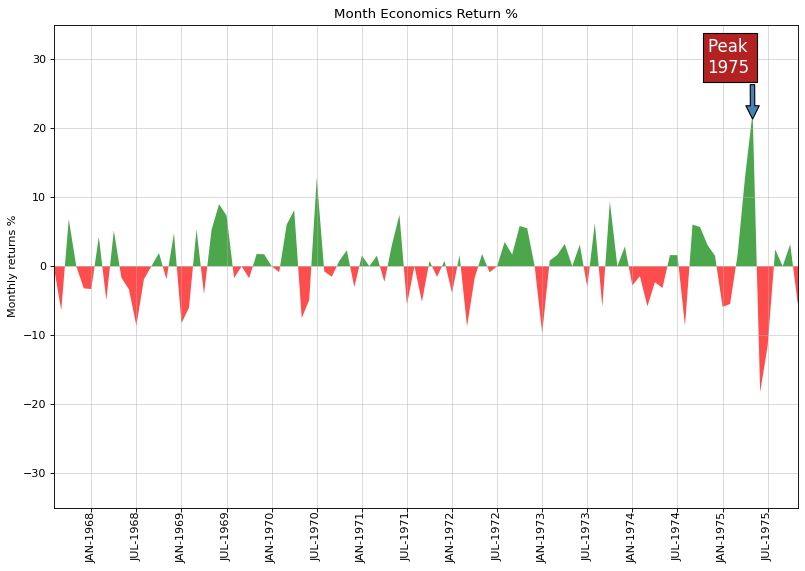

In [75]:
economics = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/economics.csv', parse_dates=['date'])

x = np.arange(economics.shape[0])
y_returns = (economics.psavert.diff().fillna(0) /
             economics.psavert.shift(1)).fillna(0) * 100

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.fill_between(x[1:],
                y_returns[1:],
                0,
                where=y_returns[1:] >= 0,
                facecolor='green',
                interpolate=True,
                alpha=0.7)

ax.fill_between(x[1:],
                y_returns[1:],
                0,
                where=y_returns[1:] <= 0,
                facecolor='red',
                interpolate=True,
                alpha=0.7)

ax.annotate('Peak \n1975',
             xy=(94.0, 21.0),
             xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05),
             fontsize=15,
             color='white')

xtickvals = [
    str(m)[:3].upper() + '-' + str(y)
    for y, m in zip(economics.date.dt.year, economics.date.dt.month_name())
]

ax.set_xticks(x[::6])
ax.set_xticklabels(xtickvals[::6],
                   rotation=90,
                   fontdict={
                       'horizontalalignment': 'center',
                       'verticalalignment': 'center_baseline'
                   })
ax.set(xlim=(1, 100), ylim=(-35, 35))
ax.set(title='Month Economics Return %')
ax.set(ylabel='Monthly returns %')
ax.grid(alpha=0.5)
plt.show()

### Stacked Area

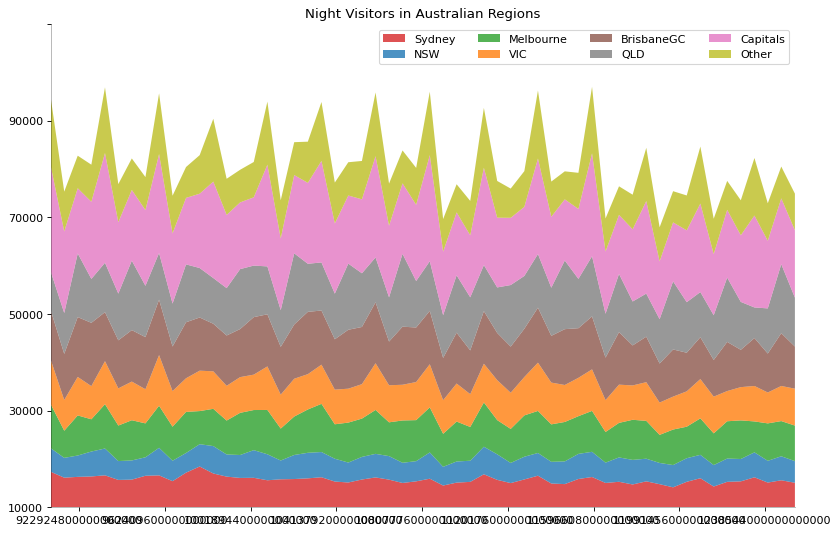

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/night_visitors.csv', parse_dates=['yearmon'])

mycolors = [
    'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',
    'tab:pink', 'tab:olive'
]

columns = df.columns[1:]
labs = columns.values.tolist()

x = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()

y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

labs = columns.values.tolist()

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

ax.set(title='Night Visitors in Australian Regions')
ax.set(ylim=[0, 100000])
ax.legend(ncol=4)
ax.set_xticklabels(x[::5], horizontalalignment='center')
ax.set_yticklabels(np.arange(10000, 100000, 20000))
ax.set(xlim=(x[0], x[-1]))

ax.spines['top'].set_alpha(0)
ax.spines['bottom'].set_alpha(.3)
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_alpha(.3)

plt.show()

### Unstacked Area 

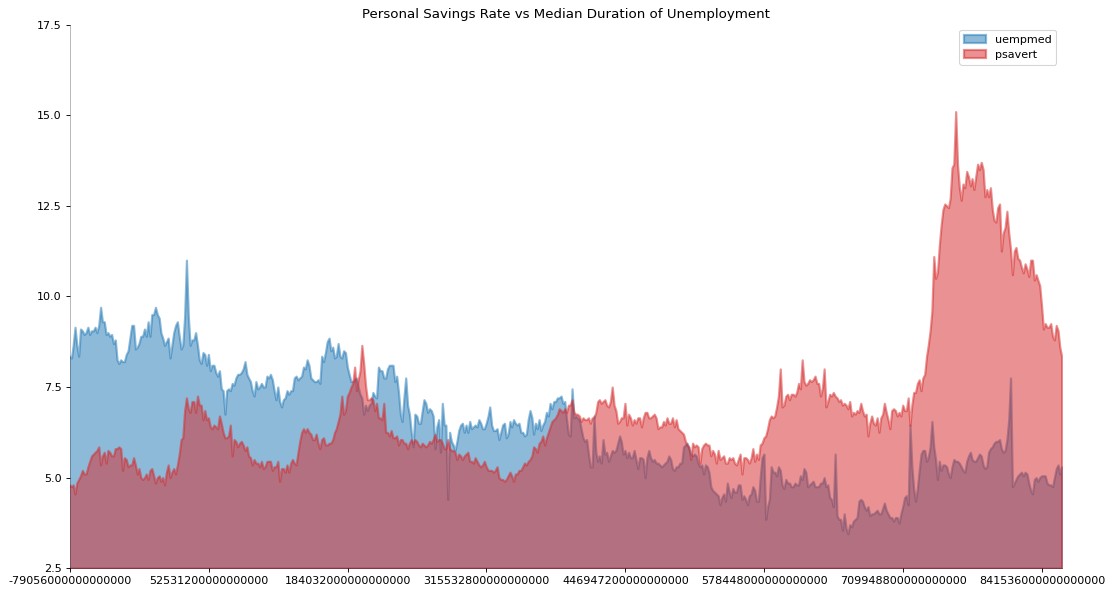

In [79]:
x = economics['date'].values.tolist()
y1 = economics['psavert'].values.tolist()
y2 = economics['uempmed'].values.tolist()
mycolors = [
    'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',
    'tab:pink', 'tab:olive'
]
columns = ['psavert', 'uempmed']

fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=80)
ax.fill_between(x,
                y1=y1,
                y2=0,
                label=columns[1],
                alpha=0.5,
                color=mycolors[1],
                linewidth=2)
ax.fill_between(x,
                y1=y2,
                y2=0,
                label=columns[0],
                alpha=0.5,
                color=mycolors[0],
                linewidth=2)

ax.set(title='Personal Savings Rate vs Median Duration of Unemployment')
ax.set(ylim=[0, 30])
ax.legend(loc='best')
ax.set_xticklabels(x[::50], horizontalalignment='center')
ax.set_yticklabels(np.arange(2.5, 30.0, 2.5))
ax.set(xlim=(-10, x[-1]))

for y in np.arange(2.5, 30.0, 2.5):
    ax.hlines(y,
               xmin=0,
               xmax=len(x),
               colors='black',
               alpha=0.3,
               linestyles='--',
               lw=0.5)

ax.spines['top'].set_alpha(0)
ax.spines['bottom'].set_alpha(.3)
ax.spines['right'].set_alpha(0)
ax.spines['left'].set_alpha(.3)
plt.show()

### Seasonal

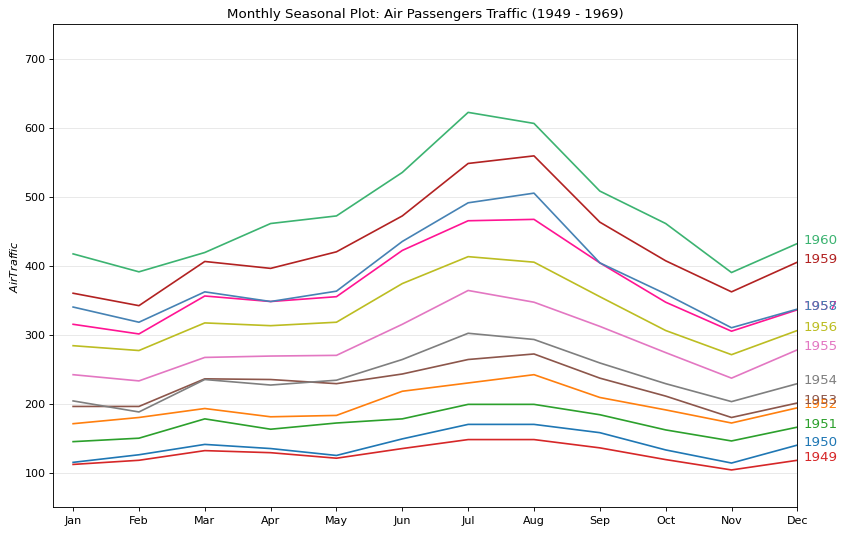

In [81]:
passengers = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/air_passengers.csv')

passengers['year'] = [parse(d).year for d in passengers.date]
passengers['month'] = [parse(d).strftime('%b') for d in passengers.date]
years = passengers['year'].unique()

mycolors = [
    'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',
    'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick',
    'mediumseagreen'
]

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

for i, y in enumerate(years):
    ax.plot('month',
            'value',
            data=passengers.loc[passengers.year == y, :],
            color=mycolors[i],
            label=y)
    ax.text(passengers.loc[passengers.year == y, :].shape[0] - .9,
            passengers.loc[passengers.year == y, 'value'][-1:].values[0],
            y,
            fontsize=12,
            color=mycolors[i])

ax.set(xlim=(-0.3, 11), ylim=(50, 750))
ax.set(ylabel='$Air Traffic$')
ax.set(title="Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)")
ax.grid(axis='y', alpha=.3)
plt.show()

## Group

### Bar

In [82]:
mpg = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mpg.csv')
mpg_group = mpg[['cty', 'manufacturer'
                ]].groupby('manufacturer').apply(lambda x: x.mean())
mpg_group.sort_values('cty', inplace=True)
mpg_group.reset_index(inplace=True)
mpg_group.head()

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000


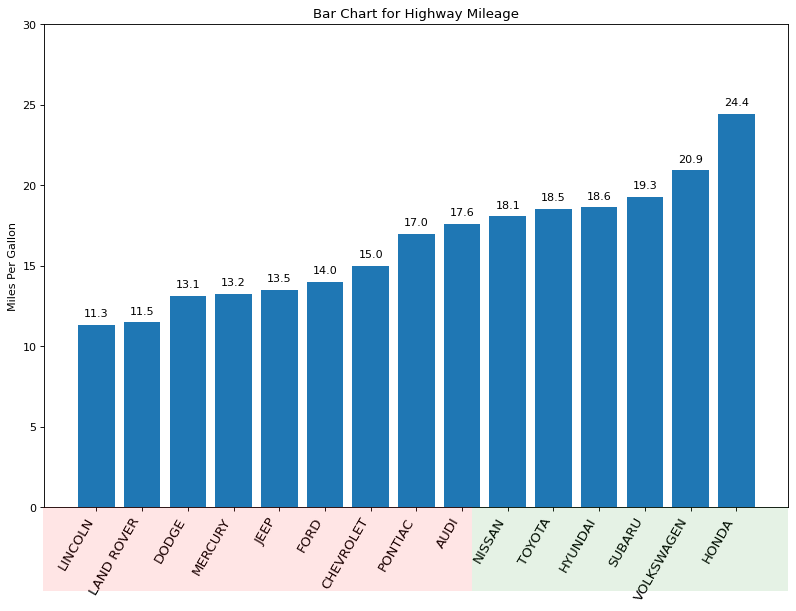

In [83]:
fig, ax = plt.subplots(figsize=(12, 8), facecolor='white', dpi=80)

ax.bar(x=mpg_group.index, height=mpg_group.cty)

for i, cty in enumerate(mpg_group.cty):
    ax.text(i, cty + 0.5, round(cty, 1), horizontalalignment='center')

p1 = patches.Rectangle((.57, -0.005),
                       width=.33,
                       height=.13,
                       alpha=.1,
                       facecolor='green',
                       transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005),
                       width=.446,
                       height=.13,
                       alpha=.1,
                       facecolor='red',
                       transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

fs = 12
ax.set(ylim=(0, 30))
ax.set(ylabel='Miles Per Gallon')
ax.set_xticks(mpg_group.index)
ax.set_xticklabels(mpg_group.manufacturer.str.upper(),
                   rotation=60,
                   horizontalalignment='right',
                   fontsize=fs)
ax.set(title='Bar Chart for Highway Mileage')
plt.show()

### Dendrogram

In [84]:
import scipy.cluster.hierarchy as shc

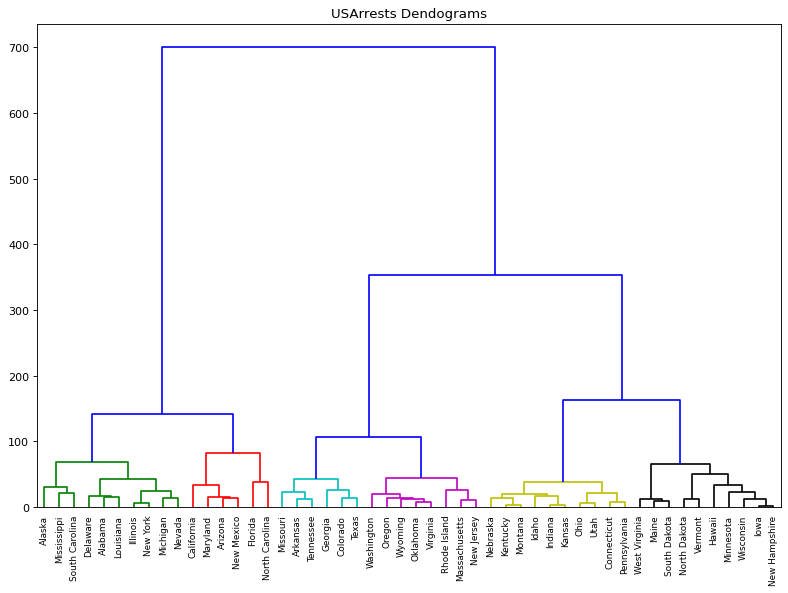

In [85]:
arrests = pd.read_csv('https://raw.githubusercontent.com/gitony0101/X4DS/main/data/us_arrests.csv')

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

dend = shc.dendrogram(shc.linkage(
    arrests[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'),
                      labels=arrests.State.values,
                      color_threshold=100)

ax.set(title="USArrests Dendograms")
plt.show()

### Cluster

In [86]:
from scipy.spatial import ConvexHull
from sklearn.cluster import AgglomerativeClustering

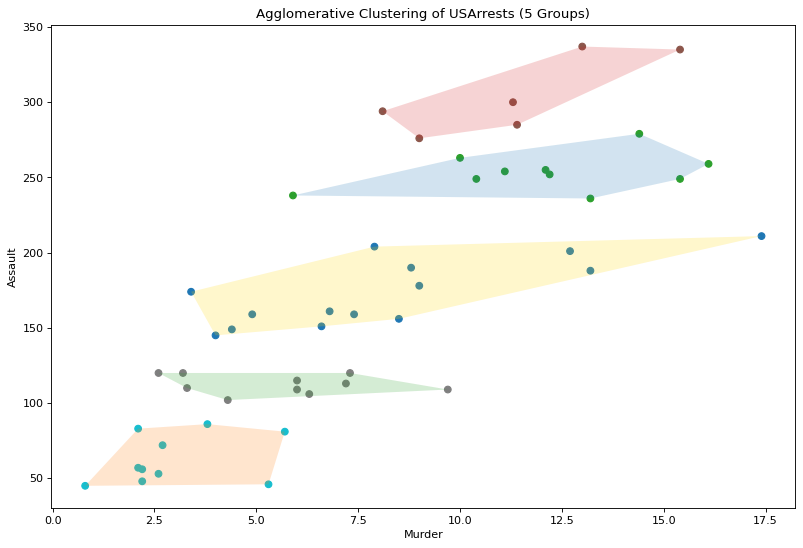

In [87]:
cluster = AgglomerativeClustering(n_clusters=5,
                                  affinity='euclidean',
                                  linkage='ward')
cluster.fit_predict(arrests[['Murder', 'Assault', 'UrbanPop', 'Rape']])

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

ax.scatter(arrests.iloc[:, 0],
           arrests.iloc[:, 1],
           c=cluster.labels_,
           cmap='tab10')


def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)


encircle(arrests.loc[cluster.labels_ == 0, 'Murder'],
         arrests.loc[cluster.labels_ == 0, 'Assault'],
         ec='k',
         fc='gold',
         alpha=0.2,
         linewidth=0)
encircle(arrests.loc[cluster.labels_ == 1, 'Murder'],
         arrests.loc[cluster.labels_ == 1, 'Assault'],
         ec='k',
         fc='tab:blue',
         alpha=0.2,
         linewidth=0)
encircle(arrests.loc[cluster.labels_ == 2, 'Murder'],
         arrests.loc[cluster.labels_ == 2, 'Assault'],
         ec='k',
         fc='tab:red',
         alpha=0.2,
         linewidth=0)
encircle(arrests.loc[cluster.labels_ == 3, 'Murder'],
         arrests.loc[cluster.labels_ == 3, 'Assault'],
         ec='k',
         fc='tab:green',
         alpha=0.2,
         linewidth=0)
encircle(arrests.loc[cluster.labels_ == 4, 'Murder'],
         arrests.loc[cluster.labels_ == 4, 'Assault'],
         ec='k',
         fc='tab:orange',
         alpha=0.2,
         linewidth=0)

ax.set(xlabel='Murder',ylabel='Assault',title='Agglomerative Clustering of USArrests (5 Groups)')
plt.show()

### Andrews Curve

In [88]:
from pandas.plotting import andrews_curves

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:241: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(-np.pi, np.pi))


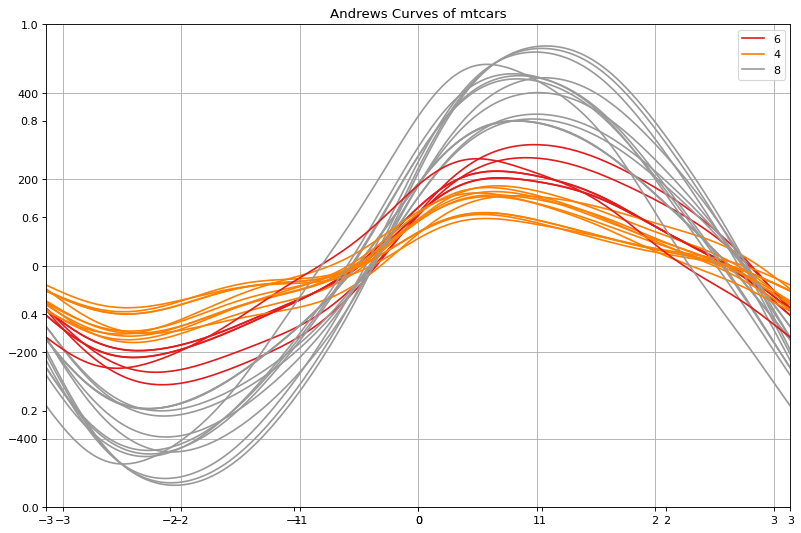

In [89]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/gitony0101/X4DS/main/data/mtcars.csv")
mtcars.drop(['cars', 'carname'], axis=1, inplace=True)

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

andrews_curves(mtcars, 'cyl', colormap='Set1')

ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(.3)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(.3)

ax.set(title='Andrews Curves of mtcars',xlim=(-3, 3))
ax.grid(alpha=0.3)
plt.show()

### Parallel Coordinates

In [90]:
from pandas.plotting import parallel_coordinates

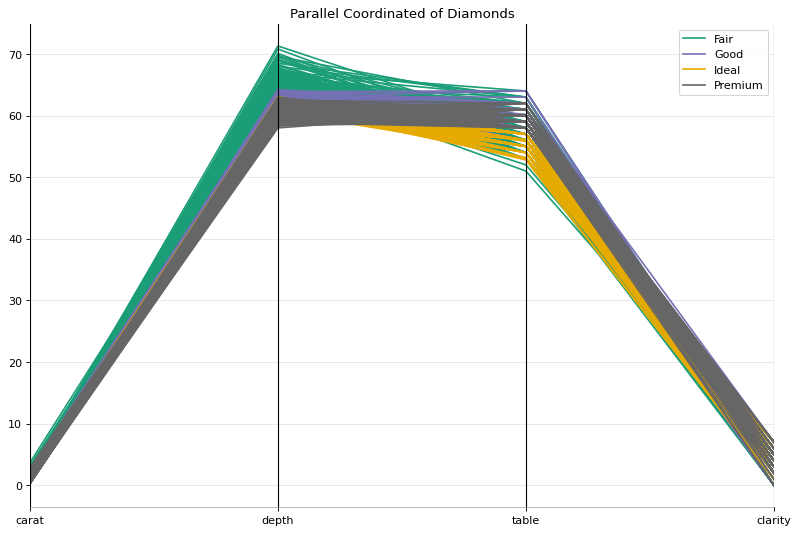

In [91]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/gitony0101/X4DS/main/data/diamonds_filter.csv")

_, ax = plt.subplots(figsize=(12, 8), dpi=80)

parallel_coordinates(diamonds, 'cut', colormap='Dark2')

ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(.3)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(.3)

ax.set(title='Parallel Coordinated of Diamonds')
ax.grid(alpha=0.3)
plt.show()

## Tricks

### Zoom-in

[inset_axes](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/zoom_inset_axes.html#sphx-glr-gallery-subplots-axes-and-figures-zoom-inset-axes-py)

[matplotlib.axes.Axes.indicate_inset_zoom](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.indicate_inset_zoom.html)

In [92]:
step = .1
x = np.arange(0,10 + step,step)
y = x ** 2

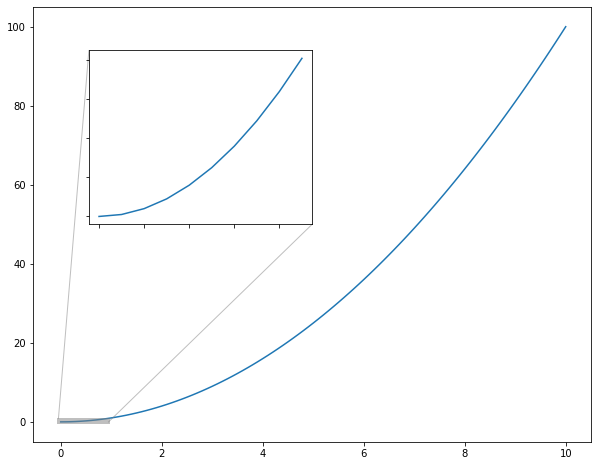

In [93]:
fig, ax = plt.subplots(figsize=[10,8])
ax.plot(x,y)

axins = ax.inset_axes([0.1,0.5,0.4,0.4])
axins.plot(x[:10],y[:10])

ax.indicate_inset_zoom(axins,linewidth=3)

axins.set_xticklabels('')
axins.set_yticklabels('')
plt.show()